#                         Exploratory Data analysis on HabermanDataset

## Dataset Information:
    Number of Instances: 306
    Number of Attributes: 4 (including the class attribute)
    Attribute Information:
    Age of patient at time of operation (numerical)
    Patient's year of operation (year - 1900, numerical)
    Number of positive axillary nodes detected (numerical)
    Survival status (class attribute):
    1 = the patient survived 5 years or longer
    2 = the patient died within 5 year

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#download the data set from  
#https://www.kaggle.com/gilsousa/habermans-survival-data-set/data
# load the data set
haberman=pd.read_csv("haberman.csv")

In [3]:
#  data-points and features
print (haberman.shape)

(305, 4)


In [4]:
#no column names mentioned in the data set. so will add headers to the columns.
haberman.columns = ["Age","Year","Axillary nodes","Survival status"]
print (haberman.columns)

Index(['Age', 'Year', 'Axillary nodes', 'Survival status'], dtype='object')


In [5]:
haberman.head()

,Age,Year,Axillary nodes,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
#how many patients are survived 5 years and more and how many died within 5years
haberman["Survival status"].value_counts()

1    224
2     81
Name: Survival status, dtype: int64

### Obervation:  
1. **Imbalanced** data set.

2. Clearly the data is not balanced as we have **224 patients survived more than 5 years and 81 patients died        within 5 years**. 

## 2-D ScatterPlot

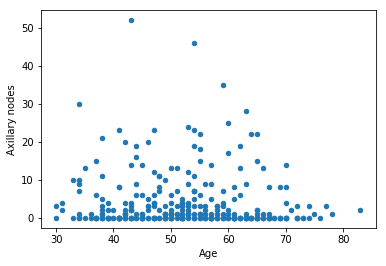

In [7]:
# lets plot plain scatter plot considering age and axillary nodes
haberman.plot(kind='scatter', x='Age', y='Axillary nodes') ;
plt.show()

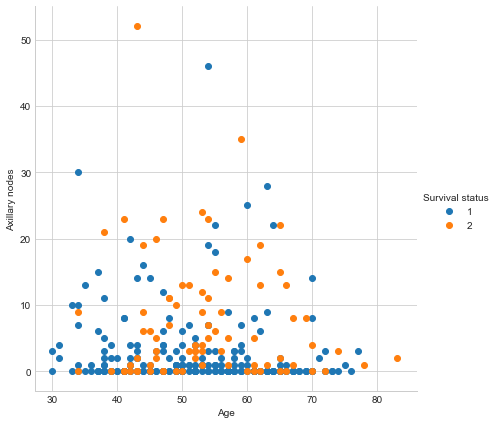

In [8]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival status", size=6) \
   .map(plt.scatter, "Age", "Axillary nodes") \
   .add_legend();
plt.show();


### Observation:

1. It seems most of the patients have 0 Auxillary nodes detected.

## Pair Plot

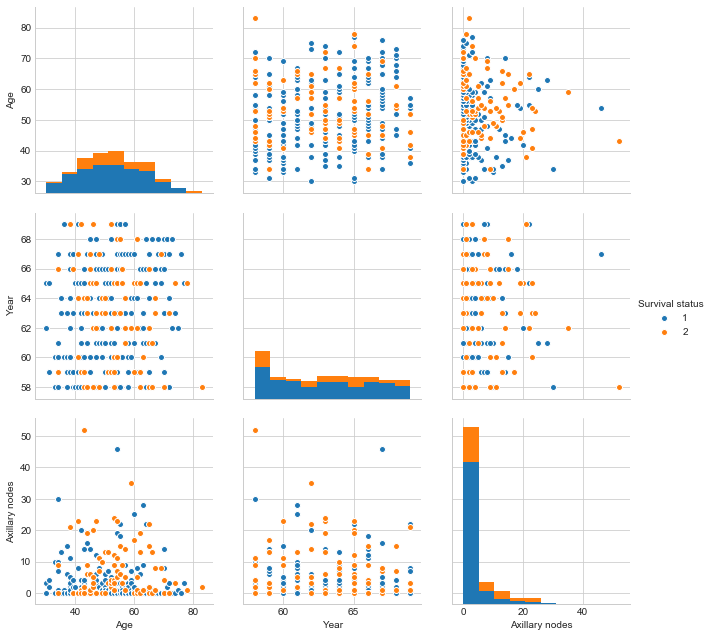

In [9]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival status",
             vars=['Age','Year','Axillary nodes'], size=3)
plt.show()
# The diagnol elements are PDFs for each feature.

### Observation:

1. ***Auxillary nodes versus Age*** is the useful plot to atleast get the insight that most people who survived have 0 Auxillary nodes detected.

2. It looks like we cannot distinguish the data easily with the help of above scalar  plots as most of them are ***overlapping***.

##  Histogram, PDF

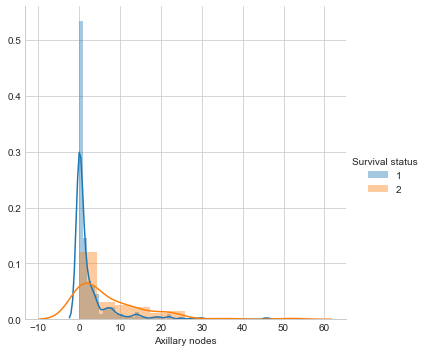

In [10]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Axillary nodes") \
   .add_legend();
plt.show();

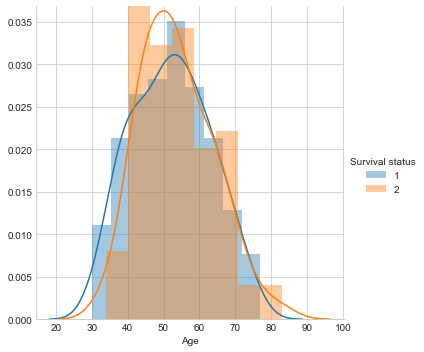

In [11]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

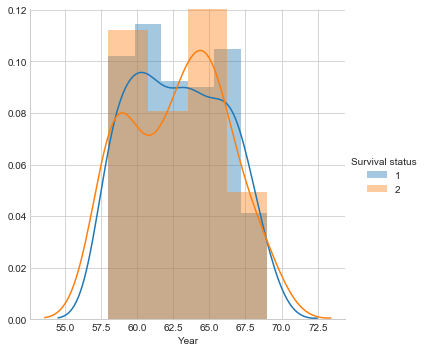

In [12]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Year") \
   .add_legend();
plt.show();

### Observation:

1. From the above PDFS(Univariate analysis) both Age and Year are not good features for useful insights as the 
  **distibution is more similar for both people who survived and also dead**.

2. **axillary nodes** is the only feature that is useful to know the survival status of patients as there is         difference between the distributions for both classes(labels). From that distibution we can infer that **most        survival patients have fall in to zero axillary nodes**.

3. From the year distribution, we can observe that people who didnt survive suddenly fall and rise in between 1958    and 1960. lets check the summary statistics to get more insights.


# CDF

In [13]:
#divide the data set in two according to the label Survival status 
# alive means status=1 and dead means status =2
alive=haberman.loc[haberman["Survival status"]==1]
dead=haberman.loc[haberman["Survival status"]==2]


[ 0.66517857  0.125       0.04464286  0.02678571  0.02232143  0.03125
  0.00892857  0.00892857  0.00446429  0.01785714  0.00446429  0.00446429
  0.00446429  0.00446429  0.00892857  0.          0.00446429  0.
  0.00446429  0.00446429  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00446429]
[  0.           1.53333333   3.06666667   4.6          6.13333333
   7.66666667   9.2         10.73333333  12.26666667  13.8         15.33333333
  16.86666667  18.4         19.93333333  21.46666667  23.          24.53333333
  26.06666667  27.6         29.13333333  30.66666667  32.2         33.73333333
  35.26666667  36.8         38.33333333  39.86666667  41.4         42.93333333
  44.46666667  46.        ]


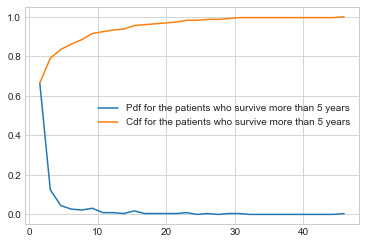

In [14]:
counts, bin_edges = np.histogram(alive['Axillary nodes'], bins=30, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
plt.show()

[ 0.33333333  0.14814815  0.08641975  0.03703704  0.04938272  0.0617284
  0.04938272  0.04938272  0.03703704  0.01234568  0.02469136  0.01234568
  0.02469136  0.04938272  0.          0.          0.          0.          0.
  0.          0.01234568  0.          0.          0.          0.          0.
  0.          0.          0.          0.01234568]
[  0.           1.73333333   3.46666667   5.2          6.93333333
   8.66666667  10.4         12.13333333  13.86666667  15.6         17.33333333
  19.06666667  20.8         22.53333333  24.26666667  26.          27.73333333
  29.46666667  31.2         32.93333333  34.66666667  36.4         38.13333333
  39.86666667  41.6         43.33333333  45.06666667  46.8         48.53333333
  50.26666667  52.        ]


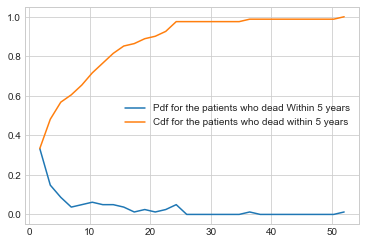

In [15]:
counts, bin_edges = np.histogram(dead['Axillary nodes'], bins=30, density=True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who dead Within 5 years',
            'Cdf for the patients who dead within 5 years'])
plt.show()

In [16]:
# check also summary statistics below to get an idea to distinguish the 
#survival and not survival

# Mean, Variance and Std-dev

In [17]:
print("Summary Statistics of Patients who are alive for more than 5 years:")
alive.describe()

Summary Statistics of Patients who are alive for more than 5 years:


,Age,Year,Axillary nodes,Survival status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [18]:
print("Summary Statistics of Patients who are dead within 5 years:")
dead.describe()

Summary Statistics of Patients who are dead within 5 years:


,Age,Year,Axillary nodes,Survival status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


### Observations:
1. From both the tables we can observe that almost for all the features the statistics are **similar except for       Axillary nodes**.

2. The **auxillary nodes mean(average) is more** for people who died within 5 years than people who live more than    5 years

3. From the observation of Cdfs, we can infer that patients **above 46 axillary nodes detected** can be considered as dead within 5 years.

# Box plot and Whiskers

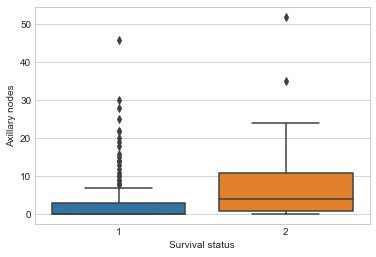

In [19]:
sns.boxplot(x='Survival status',y='Axillary nodes', data=haberman)
plt.show()

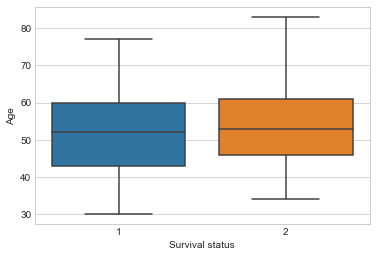

In [20]:
sns.boxplot(x='Survival status',y='Age', data=haberman)
plt.show()

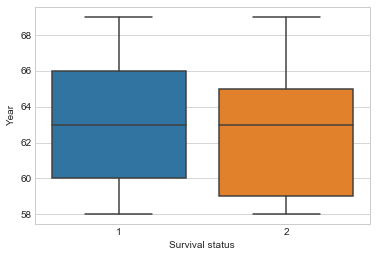

In [21]:
sns.boxplot(x='Survival status',y='Year', data=haberman)
plt.show()

## Violin plots

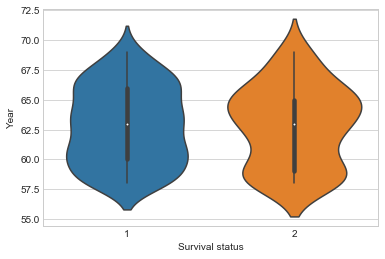

In [22]:
# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x='Survival status',y='Year', data=haberman,size=8)
plt.show()

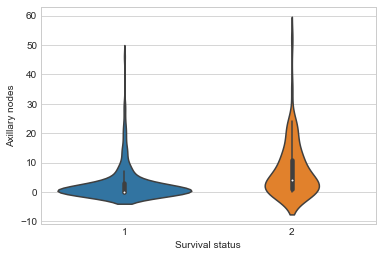

In [23]:
sns.violinplot(x='Survival status',y='Axillary nodes', data=haberman,size=8)
plt.show()

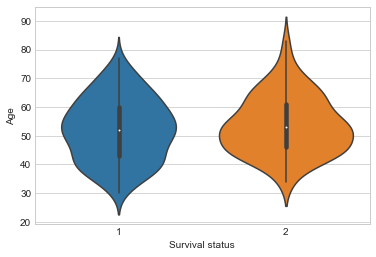

In [24]:

sns.violinplot(x='Survival status',y='Age', data=haberman,size=8)
plt.show()

### Observation:
1. From box,violin plots we can say that more no of patients who are dead have **age between 46-62,year between      59-65** and the patients who survived have **age between 42-60, year between 60-66**.
    

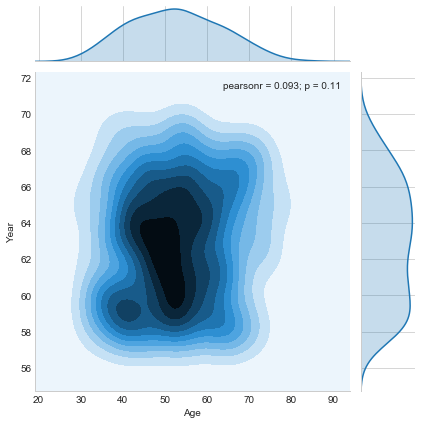

In [25]:
# contors-plot
sns.jointplot(x="Age", y="Year", data=haberman, kind="kde");
plt.show();